## Load & Display data

In [2]:
import pandas as pd

In [3]:
# Load the datasets
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')


In [4]:
# Display the first few rows of each dataframe to understand their structure
print("Training Data:")
print(train_df.head())


Training Data:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0    

In [5]:
print("\nTest Data:")
print(test_df.head())


Test Data:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0 

## View First Image

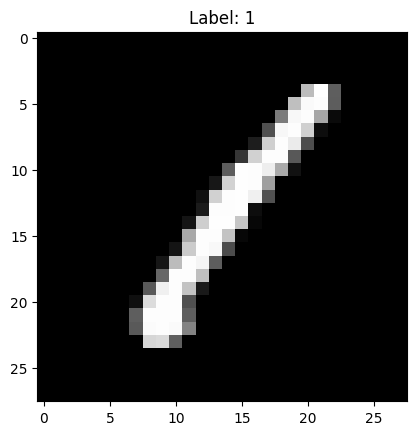

In [6]:
import matplotlib.pyplot as plt
# Extract labels and pixel data
y = train_df['label']  # Labels
X = train_df.drop(columns=['label'])  # Pixel values

# Select the first image from the dataset
first_image = X.iloc[0].values  # Extract pixel values of the first image
first_image_reshaped = first_image.reshape(28, 28)  # Reshape to 28x28

# Display the first image
plt.imshow(first_image_reshaped, cmap='gray')
plt.title(f'Label: {y.iloc[0]}')
plt.show()

### display first few image

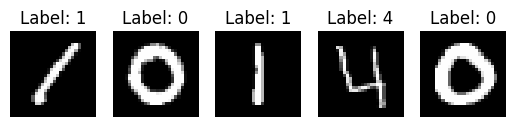

In [7]:
# Display the first 5 images in the dataset
for i in range(5):
    image = X.iloc[i].values.reshape(28, 28)  # Reshape each image
    label = y.iloc[i]  # Get the label for the image
    
    plt.subplot(1, 5, i + 1)  # Create subplots
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')  # Hide the axes

plt.show()


## Normalization and Splits

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize pixel values
X_normalized = X / 255.0


In [9]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [10]:
import numpy as np

# Convert DataFrames to NumPy arrays and normalize
X_train_np = X_train.to_numpy().reshape(-1, 28, 28, 1)
X_val_np = X_val.to_numpy().reshape(-1, 28, 28, 1)

## Data Augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the data generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Fit the generator to your training data
datagen.fit(X_train_np)


## Build Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf

# Define and compile the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler


# Define a learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Create the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)

# Define the callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath='/kaggle/working/best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model with callbacks
history = model.fit(X_train_np, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val_np, y_val),
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/20
1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8776 - loss: 0.4037
Epoch 1: val_loss improved from inf to 0.05834, saving model to /kaggle/working/best_model.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.8778 - loss: 0.4030 - val_accuracy: 0.9813 - val_loss: 0.0583
Epoch 2/20
1049/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9832 - loss: 0.0528
Epoch 2: val_loss improved from 0.05834 to 0.04477, saving model to /kaggle/working/best_model.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9832 - loss: 0.0528 - val_accuracy: 0.9839 - val_loss: 0.0448
Epoch 3/20
1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9908 - loss: 0.0321
Epoch 3: val_loss improved from 0.04477 to 0.03995, saving model to /kaggle/working/best_model.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9908 - loss: 0.0321 - val_accuracy: 0.9879 - val_loss: 0.0400
Epoch 4/20
1049/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.99

In [15]:
from tensorflow.keras.models import load_model

# Load the best model saved during training
best_model = load_model('/kaggle/working/best_model.keras')

# Optionally, you can compile the model again if you need to continue training
best_model.compile(optimizer='adam',  # or whatever optimizer you were using
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Evaluate the model on the validation set
val_loss, val_accuracy = best_model.evaluate(X_val_np, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9903 - loss: 0.0365
Validation Loss: 0.031176438555121422
Validation Accuracy: 0.9917857050895691


In [17]:
# Normalize test data
X_test = test_df / 255.0

# Reshape test data
X_test_np = X_test.to_numpy().reshape(-1, 28, 28, 1)

# Make predictions
predictions = best_model.predict(X_test_np)
predicted_labels = predictions.argmax(axis=1)  # Get the class with the highest probability


875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [18]:
# Prepare the submission DataFrame
submission = pd.DataFrame({'ImageId': range(1, len(predicted_labels) + 1),
                           'Label': predicted_labels})


In [19]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [20]:
# Save the submission file
submission.to_csv('/kaggle/working/submission4.csv', index=False)